In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import graphviz
import scipy
from math import sqrt

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#model metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation
#from sklearn.cross_validation import train_test_split

In [25]:
creditx.iloc[0:0]
creditxx.iloc[0:0]
creditxxx.iloc[0:0]

NameError: name 'creditxx' is not defined

In [26]:
creditx = pd.read_csv('c:/users/sully/desktop/C5 T1/default of credit card clients.csv', skiprows=1)
creditx.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [27]:
creditx = creditx.rename(columns={"default payment next month": "default_payment_next_month"})

In [28]:
creditx.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [29]:
#credit_stats = creditx.describe()
#credit_stats.to_csv('c:/users/sully/desktop/C5 T1/credit_stats.csv')

In [30]:
creditx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [31]:
#creditx['SEX'] = pd.Categorical(creditx.SEX)
#creditx['MARRIAGE'] = pd.Categorical(creditx.MARRIAGE)
creditx['EDUCATION'] = pd.Categorical(creditx.EDUCATION)
#creditx['default_payment_next_month'] = pd.Categorical(creditx.default_payment_next_month)

In [32]:
def age_groups(series):
    if series < 26:
        return 23
    elif 26 <= series < 46:
        return 36
    elif series >= 46:
        return 62

creditx['age_group'] = creditx['AGE'].apply(age_groups)
creditx['age_group'].value_counts(sort=False)

36    21460
23     3871
62     4669
Name: age_group, dtype: int64

In [33]:
def pay_hist0(series):
    if series < 1:
        return 0
    elif series >= 1:
        return 1

creditx['pay_hist0'] = creditx['PAY_0'].apply(pay_hist0)
creditx['pay_hist0'].value_counts(sort=False)

0    23182
1     6818
Name: pay_hist0, dtype: int64

In [34]:
#creditx['pay_amt_bin'] = pd.cut(x=creditx['PAY_AMT1'], bins=[-100, 0, 316, 1263, 1724, 2100, 3000, 4309, 6192, 10300, 873552], 
#                                labels=[0, 316, 1263, 1724, 2100, 3000, 4309, 6192, 10300, 873552])

In [35]:
def pay_amt1(series):
    if series < 316:
        return 316
    elif series < 1263:
        return 1263
    elif series < 1724:
        return 1724
    elif series < 2100:
        return 2100
    elif series < 3000:
        return 3000
    elif series < 4309:
        return 4309
    elif series < 6192:
        return 6192
    elif series < 10300:
        return 10300
    elif series < 873553:
        return 873553

creditx['pay_amt1_dec'] = creditx['PAY_AMT1'].apply(pay_amt1)
creditx['pay_amt1_dec'].value_counts(sort=False)

6192      3000
2100      2888
4309      3774
10300     2999
3000      2341
873553    3002
316       5940
1724      3003
1263      3053
Name: pay_amt1_dec, dtype: int64

In [36]:
creditx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   ID                          30000 non-null  int64   
 1   LIMIT_BAL                   30000 non-null  int64   
 2   SEX                         30000 non-null  int64   
 3   EDUCATION                   30000 non-null  category
 4   MARRIAGE                    30000 non-null  int64   
 5   AGE                         30000 non-null  int64   
 6   PAY_0                       30000 non-null  int64   
 7   PAY_2                       30000 non-null  int64   
 8   PAY_3                       30000 non-null  int64   
 9   PAY_4                       30000 non-null  int64   
 10  PAY_5                       30000 non-null  int64   
 11  PAY_6                       30000 non-null  int64   
 12  BILL_AMT1                   30000 non-null  int64   
 13  BILL_AMT2       

In [37]:
creditx.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,age_group,pay_hist0,pay_amt1_dec
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,689,0,0,0,0,1,23,1,316
1,2,120000,2,2,2,26,-1,2,0,0,...,0,1000,1000,1000,0,2000,1,36,0,316
2,3,90000,2,2,2,34,0,0,0,0,...,1518,1500,1000,1000,1000,5000,0,36,0,1724
3,4,50000,2,2,1,37,0,0,0,0,...,2000,2019,1200,1100,1069,1000,0,36,0,2100
4,5,50000,1,2,1,57,-1,0,-1,0,...,2000,36681,10000,9000,689,679,0,62,0,2100


In [38]:
# calculate Pearson's correlation
creditx.corr()

,ID,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,age_group,pay_hist0,pay_amt1_dec
ID,1.000000,0.026179,0.018497,-0.029079,0.018678,-0.030575,-0.011215,-0.018494,-0.002735,-0.022199,...,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000,-0.013952,0.013741,-0.025997,0.003425
LIMIT_BAL,0.026179,1.000000,0.024755,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,...,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520,0.113709,-0.157742,0.294392
SEX,0.018497,0.024755,1.000000,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,...,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961,-0.079008,-0.024760,-0.002805
MARRIAGE,-0.029079,-0.108139,-0.031389,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,...,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339,-0.286552,-0.013658,-0.017871
AGE,0.018678,0.144713,-0.090874,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,...,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890,0.832608,-0.003073,0.046593
PAY_0,-0.030575,-0.271214,-0.057643,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,...,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794,-0.029877,0.765623,-0.114626
PAY_2,-0.011215,-0.296382,-0.070771,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,...,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551,-0.035831,0.423435,-0.112287
PAY_3,-0.018494,-0.286123,-0.066096,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,...,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253,-0.036980,0.296752,-0.028484
PAY_4,-0.002735,-0.267460,-0.060173,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,...,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614,-0.033593,0.259523,-0.041379
PAY_5,-0.022199,-0.249411,-0.055064,0.035629,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,...,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027,0.204149,-0.037368,0.242448,-0.038506


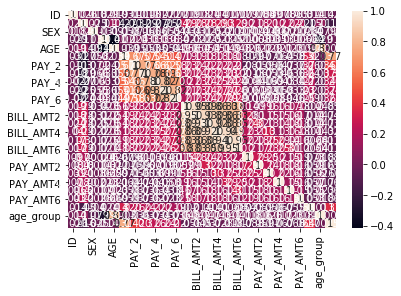

In [155]:
#corrMatrix = creditx.corr()
#sn.heatmap(corrMatrix, annot=True)
#plt.show()

In [156]:
#corrMatrix.to_csv('c:/users/sully/desktop/C5 T1/dccc.csv')

In [157]:
# In examining correlations, it is clear that the monthly bills are well correlated month to month, 
# and the payments per month are well correlated month to month. 

In [39]:
creditx['Bill_avg'] = creditx[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1)
creditx['Pay_avg'] = creditx[['PAY_AMT1', 'PAY_AMT1', 'PAY_AMT1', 'PAY_AMT1', 'PAY_AMT1', 'PAY_AMT1']].mean(axis=1)

In [40]:
creditxx = creditx.drop(['BILL_AMT1','BILL_AMT2', 'BILL_AMT3','BILL_AMT4', 'BILL_AMT5','BILL_AMT6',
                        'PAY_AMT1','PAY_AMT2', 'PAY_AMT3','PAY_AMT4', 'PAY_AMT5','PAY_AMT6', 'AGE', 
                        'PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'
                        ], axis=1)

In [41]:
print(creditxx.iloc[[28716]])

          ID  LIMIT_BAL  SEX EDUCATION  MARRIAGE  default_payment_next_month  \
28716  28717     340000    2         1         3                           0   

       age_group  pay_hist0  pay_amt1_dec  Bill_avg   Pay_avg  
28716         36          0        873553  182092.0  873552.0  


In [42]:
creditz = creditxx.drop(creditxx.index[28716])

In [43]:
creditz.describe()

,ID,LIMIT_BAL,SEX,MARRIAGE,default_payment_next_month,age_group,pay_hist0,pay_amt1_dec,Bill_avg,Pay_avg
count,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000
mean,15000.042768,167478.571952,1.603720,1.551818,0.221207,38.369112,0.227274,90378.291610,44972.374546,5634.649922
std,8660.180611,129746.000761,0.489132,0.521911,0.415067,11.018637,0.419078,261131.930918,63256.822472,15787.375131
min,1.000000,10000.000000,1.000000,0.000000,0.000000,23.000000,0.000000,316.000000,-56043.166667,0.000000
25%,7500.500000,50000.000000,1.000000,1.000000,0.000000,36.000000,0.000000,1263.000000,4781.166667,1000.000000
50%,15000.000000,140000.000000,2.000000,2.000000,0.000000,36.000000,0.000000,3000.000000,21051.500000,2100.000000
75%,22499.500000,240000.000000,2.000000,2.000000,0.000000,36.000000,0.000000,6192.000000,57103.416667,5006.000000
max,30000.000000,1000000.000000,2.000000,3.000000,1.000000,62.000000,1.000000,873553.000000,877313.833333,505000.000000


In [44]:
creditzz = creditz.drop(creditz.index[2197])

In [45]:
creditzz.describe()

,ID,LIMIT_BAL,SEX,MARRIAGE,default_payment_next_month,age_group,pay_hist0,pay_amt1_dec,Bill_avg,Pay_avg
count,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000
mean,15000.469531,167450.819388,1.603707,1.551837,0.221215,38.368325,0.227282,90352.184046,44944.627981,5633.144843
std,8660.009504,129659.090537,0.489135,0.521910,0.415072,11.017976,0.419083,261097.128328,63075.057092,15785.485882
min,1.000000,10000.000000,1.000000,0.000000,0.000000,23.000000,0.000000,316.000000,-56043.166667,0.000000
25%,7501.250000,50000.000000,1.000000,1.000000,0.000000,36.000000,0.000000,1263.000000,4781.000000,1000.000000
50%,15000.500000,140000.000000,2.000000,2.000000,0.000000,36.000000,0.000000,3000.000000,21048.416667,2100.000000
75%,22499.750000,240000.000000,2.000000,2.000000,0.000000,36.000000,0.000000,6192.000000,57100.625000,5006.000000
max,30000.000000,800000.000000,2.000000,3.000000,1.000000,62.000000,1.000000,873553.000000,592431.833333,505000.000000


In [46]:
#plt.hist(creditxx['Bill_avg'], bins=20)

In [47]:
#plt.hist(creditxx['Pay_avg'], bins=20)

In [48]:
#plt.hist(creditxx['Pay_code_avg'], bins=20)

In [49]:
creditzz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29998 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   ID                          29998 non-null  int64   
 1   LIMIT_BAL                   29998 non-null  int64   
 2   SEX                         29998 non-null  int64   
 3   EDUCATION                   29998 non-null  category
 4   MARRIAGE                    29998 non-null  int64   
 5   default_payment_next_month  29998 non-null  int64   
 6   age_group                   29998 non-null  int64   
 7   pay_hist0                   29998 non-null  int64   
 8   pay_amt1_dec                29998 non-null  int64   
 9   Bill_avg                    29998 non-null  float64 
 10  Pay_avg                     29998 non-null  float64 
dtypes: category(1), float64(2), int64(8)
memory usage: 2.5 MB


In [50]:
#creditxx['Pay_code_quint'] = pd.qcut(creditxx['Pay_code_avg'],
#                            q=[0, .2, .4, .6, .8, 1],
#                            labels=False,
#                            precision=0)

In [51]:
#creditxx['Bill_avg_quint'] = pd.qcut(creditxx['Bill_avg'],
#                            q=[0, .2, .4, .6, .8, 1],
#                            labels=False,
#                            precision=0)

In [52]:
#creditxx['Pay_avg_quint'] = pd.qcut(creditxx['Pay_avg'],
#                            q=[0, .2, .4, .6, .8, 1],
#                            labels=False,
#                            precision=0)

In [53]:
#creditxx['lim_bal_quint'] = pd.qcut(creditxx['LIMIT_BAL'],
#                            q=[0, .2, .4, .6, .8, 1],
#                            labels=False,
#                            precision=0)

In [54]:
creditzz.to_csv('c:/users/sully/desktop/C5 T1/creditzz.csv')

In [55]:
pd.get_dummies(creditzz, columns=["EDUCATION"]).head()

,ID,LIMIT_BAL,SEX,MARRIAGE,default_payment_next_month,age_group,pay_hist0,pay_amt1_dec,Bill_avg,Pay_avg,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6
0,1,20000,2,1,1,23,1,316,1284.000000,0.0,0,0,1,0,0,0,0
1,2,120000,2,2,1,36,0,316,2846.166667,0.0,0,0,1,0,0,0,0
2,3,90000,2,2,0,36,0,1724,16942.166667,1518.0,0,0,1,0,0,0,0
3,4,50000,2,1,0,36,0,2100,38555.666667,2000.0,0,0,1,0,0,0,0
4,5,50000,1,1,0,62,0,2100,18223.166667,2000.0,0,0,1,0,0,0,0


In [56]:
creditxxx = pd.get_dummies(creditzz, columns=["EDUCATION"])

In [57]:
creditxxx = creditxxx.drop(['EDUCATION_6'], axis=1)

In [58]:
creditxxx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29998 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          29998 non-null  int64  
 1   LIMIT_BAL                   29998 non-null  int64  
 2   SEX                         29998 non-null  int64  
 3   MARRIAGE                    29998 non-null  int64  
 4   default_payment_next_month  29998 non-null  int64  
 5   age_group                   29998 non-null  int64  
 6   pay_hist0                   29998 non-null  int64  
 7   pay_amt1_dec                29998 non-null  int64  
 8   Bill_avg                    29998 non-null  float64
 9   Pay_avg                     29998 non-null  float64
 10  EDUCATION_0                 29998 non-null  uint8  
 11  EDUCATION_1                 29998 non-null  uint8  
 12  EDUCATION_2                 29998 non-null  uint8  
 13  EDUCATION_3                 299

In [59]:
creditxxx.to_csv('c:/users/sully/desktop/C5 T1/creditxxx.csv')

In [60]:
creditxxx.head()

,ID,LIMIT_BAL,SEX,MARRIAGE,default_payment_next_month,age_group,pay_hist0,pay_amt1_dec,Bill_avg,Pay_avg,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5
0,1,20000,2,1,1,23,1,316,1284.000000,0.0,0,0,1,0,0,0
1,2,120000,2,2,1,36,0,316,2846.166667,0.0,0,0,1,0,0,0
2,3,90000,2,2,0,36,0,1724,16942.166667,1518.0,0,0,1,0,0,0
3,4,50000,2,1,0,36,0,2100,38555.666667,2000.0,0,0,1,0,0,0
4,5,50000,1,1,0,62,0,2100,18223.166667,2000.0,0,0,1,0,0,0


In [61]:
creditxxx.describe()

,ID,LIMIT_BAL,SEX,MARRIAGE,default_payment_next_month,age_group,pay_hist0,pay_amt1_dec,Bill_avg,Pay_avg,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5
count,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000
mean,15000.469531,167450.819388,1.603707,1.551837,0.221215,38.368325,0.227282,90352.184046,44944.627981,5633.144843,0.000467,0.352790,0.467698,0.163911,0.004100,0.009334
std,8660.009504,129659.090537,0.489135,0.521910,0.415072,11.017976,0.419083,261097.128328,63075.057092,15785.485882,0.021599,0.477846,0.498964,0.370201,0.063903,0.096162
min,1.000000,10000.000000,1.000000,0.000000,0.000000,23.000000,0.000000,316.000000,-56043.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7501.250000,50000.000000,1.000000,1.000000,0.000000,36.000000,0.000000,1263.000000,4781.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,0.000000,36.000000,0.000000,3000.000000,21048.416667,2100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22499.750000,240000.000000,2.000000,2.000000,0.000000,36.000000,0.000000,6192.000000,57100.625000,5006.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,30000.000000,800000.000000,2.000000,3.000000,1.000000,62.000000,1.000000,873553.000000,592431.833333,505000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [181]:
#Slice data for training & testing, features, and target

In [62]:
X = creditxxx.iloc[:,1:17]

In [63]:
X.head()

,LIMIT_BAL,SEX,MARRIAGE,default_payment_next_month,age_group,pay_hist0,pay_amt1_dec,Bill_avg,Pay_avg,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5
0,20000,2,1,1,23,1,316,1284.000000,0.0,0,0,1,0,0,0
1,120000,2,2,1,36,0,316,2846.166667,0.0,0,0,1,0,0,0
2,90000,2,2,0,36,0,1724,16942.166667,1518.0,0,0,1,0,0,0
3,50000,2,1,0,36,0,2100,38555.666667,2000.0,0,0,1,0,0,0
4,50000,1,1,0,62,0,2100,18223.166667,2000.0,0,0,1,0,0,0


In [64]:
X = X.drop(labels='default_payment_next_month', axis=1)
X = X.drop(labels='SEX',axis=1)
X = X.drop(labels='MARRIAGE', axis=1)
#X = X.drop(labels='Bill_avg', axis=1)
#X = X.drop(labels='Pay_avg', axis=1)

In [65]:
X.head()

,LIMIT_BAL,age_group,pay_hist0,pay_amt1_dec,Bill_avg,Pay_avg,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5
0,20000,23,1,316,1284.000000,0.0,0,0,1,0,0,0
1,120000,36,0,316,2846.166667,0.0,0,0,1,0,0,0
2,90000,36,0,1724,16942.166667,1518.0,0,0,1,0,0,0
3,50000,36,0,2100,38555.666667,2000.0,0,0,1,0,0,0
4,50000,62,0,2100,18223.166667,2000.0,0,0,1,0,0,0


In [66]:
y = creditxxx.iloc[:,4:5]

In [67]:
y.head()

,default_payment_next_month
0,1
1,1
2,0
3,0
4,0


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=997)

In [69]:
y_test.head()

,default_payment_next_month
27824,0
11120,0
9812,0
9520,0
13553,0


In [70]:
X_test.head()

,LIMIT_BAL,age_group,pay_hist0,pay_amt1_dec,Bill_avg,Pay_avg,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5
27824,320000,36,0,873553,210569.333333,100741.0,0,0,1,0,0,0
11120,20000,23,0,1263,390.000000,390.0,0,0,1,0,0,0
9812,110000,36,0,4309,74023.500000,3851.0,0,0,1,0,0,0
9520,190000,36,0,316,656.666667,0.0,0,0,0,1,0,0
13553,360000,36,0,316,58016.000000,40.0,0,1,0,0,0,0


In [71]:
rf = RandomForestClassifier()

In [72]:
model1 = rf.fit(X_train, np.ravel(y_train))

In [73]:
preds = model1.predict(X_test)

In [74]:
preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [75]:
print(accuracy_score(y_test, preds))

0.7845333333333333


In [76]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      5834
           1       0.52      0.33      0.41      1666

    accuracy                           0.78      7500
   macro avg       0.68      0.62      0.64      7500
weighted avg       0.76      0.78      0.77      7500



In [77]:
y_test.to_csv('c:/users/sully/desktop/y_test16.csv')

In [78]:
y_preddf = pd.DataFrame(preds)
y_preddf.to_csv('c:/users/sully/desktop/y_pred16.csv')